<div style="text-align:center">
    <h1>
        Value Iteration
    </h1>
</div>
<br>

<div style="text-align:center">
    <p>
        In this notebook we are going to look at a dynamic programming algorithm called value iteration. In it, we will sweep the state space and update all the V(s) values.
    </p>
</div>

<br><br>
<div style="text-align:center">
    <b>This notebook belongs to section 3 of the course "Reinforcement Learning: beginner to master".</b>
    <br><br>
    <a href="https://www.udemy.com">Reinforcement Learning: beginner to master</a> (English)
    <br>
    <a href="https://www.udemy.com">Reinforcement Learning: de principiante a maestro</a> (Spanish)
</div>

<br>

<table style="width:35%">
  <tr style="background-color: transparent">
    <td style="width: 45%">
        <a target="_parent" href="https://www.evlabs.io" style="float: center">
            <img src="img/evlabs-square.png" width="75"/>
        </a> 
    </td>
    <td valign="bottom">
        <a target="_parent" href="https://www.youtube.com/channel/UCksRNSzWuMV5IfdrPlglqqw">
            <img src="img/YouTube.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://www.linkedin.com/company/evlabs">
            <img src="img/LinkedIn.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://twitter.com/evelabs">
            <img src="img/Twitter.png" width="35"/>
        </a> 
    </td>
    <td>
        <a target="_parent" href="https://github.com/escape-velocity-labs/">
            <img src="img/GitHub.png" width="35"/>
        </a> 
    </td>

  </tr>
  <tr style="background-color: transparent">
    <th style="text-align: center; width: 70%">Escape Velocity Labs</th>
  </tr>

</table>

<br>

## Import the necessary software libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F 
from torch import optim
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from pyvirtualdisplay import Display
from IPython import display as ipythondisplay
from IPython.display import clear_output
from pathlib import Path

import random, os.path, math, glob, csv, base64, itertools, sys
import gym
from gym.wrappers import Monitor
from pprint import pprint

# The following code is will be used to visualize the environments.

def show_video(directory):
    html = []
    for mp4 in Path(directory).glob("*.mp4"):
        video_b64 = base64.b64encode(mp4.read_bytes())
        html.append('''<video alt="{}" autoplay 
                      loop controls style="height: 400px;">
                      <source src="data:video/mp4;base64,{}" type="video/mp4" />
                 </video>'''.format(mp4, video_b64.decode('ascii')))
    ipythondisplay.display(ipythondisplay.HTML(data="<br>".join(html)))
    
display = Display(visible=0, size=(1400, 900))
display.start();

def make_seed(seed):
    np.random.seed(seed=seed)
    torch.manual_seed(seed=seed)


## Initialize the environment

In [3]:
env = Maze()

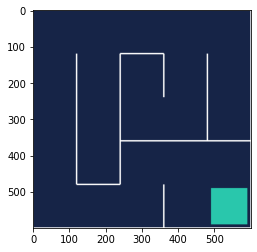

In [4]:
frame = env.render(mode = "rgb_array")
plt.imshow(frame)

In [6]:
print(f"{env.observation_space.nvec}, {env.action_space.n}")

[5 5], 4


## Define the policy $\pi(\cdot|s)$

#### Create the policy $\pi(\cdot|s)$

In [7]:
policy_probs = np.full((5,5,4), 0.25)

In [8]:
def policy(state):
    return policy_probs[state]

#### Test the policy with state (0, 0)

In [9]:
action_probabilities = policy((0, 0))

In [11]:
for action, prob in zip(range(4), action_probabilities):
    print(action, prob)

0 0.25
1 0.25
2 0.25
3 0.25


#### See how the random policy does in the maze

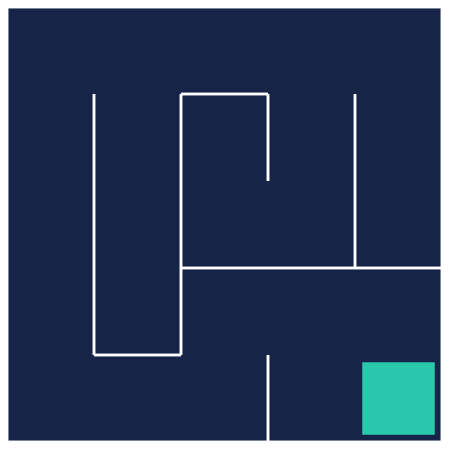

In [12]:
test_agent(env,policy, episodes=1)

#### Plot the policy

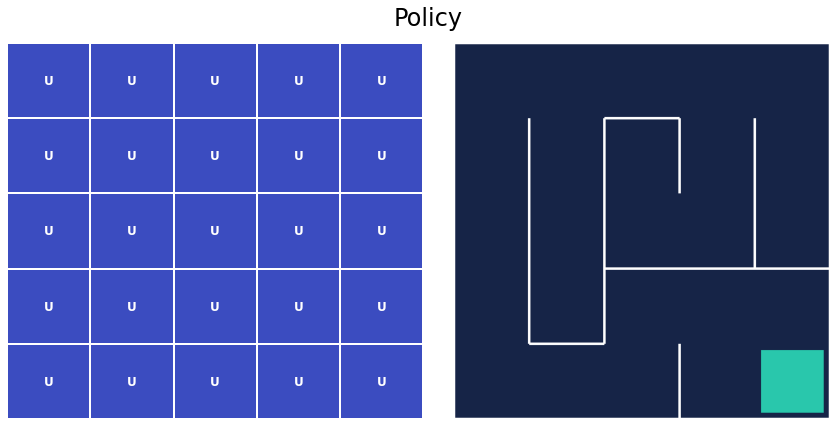

In [13]:
plot_policy(policy_probs, frame)

## Define value table $V(s)$

#### Create the $V(s)$ table

In [14]:
state_values = np.zeros(shape = (5,5))

#### Plot $V(s)$

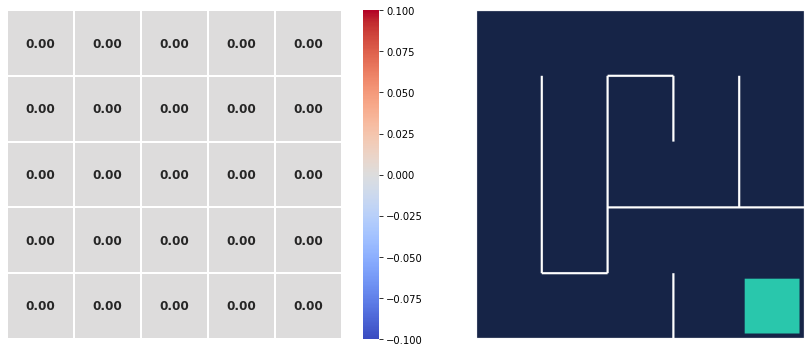

In [15]:
plot_values(state_values, frame)

## Implement the Value Iteration algorithm

</br>


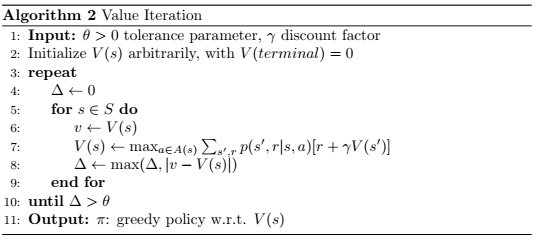

<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>

In [17]:
policy_probs.shape, state_values.shape

((5, 5, 4), (5, 5))

In [21]:
def value_iteration(policy_probs, state_values, theta = 1e-6, gamma = 0.99):
    delta = float("inf")
    while delta > theta:
        delta = 0
        for row in range(5):
            for col in range(5):
                old_value = state_values[row, col]
                action_probs =  None
                max_qsa = float("-inf")
                
                for action in range(4):
                    next_state, reward, _, _ = env.simulate_step((row, col), action)
                    qsa = reward + gamma * state_values[next_state]
                    if qsa > max_qsa:
                        max_qsa = qsa
                        action_probs = np.zeros(4)
                        action_probs[action] = 1

                state_values[row, col] = max_qsa
                policy_probs[row, col] = action_probs
                
                delta = max(delta, np.abs(old_value - max_qsa))
                
value_iteration(policy_probs, state_values, theta = 1e-6, gamma = 0.99)    

## Show results

#### Show resulting value table $V(s)$

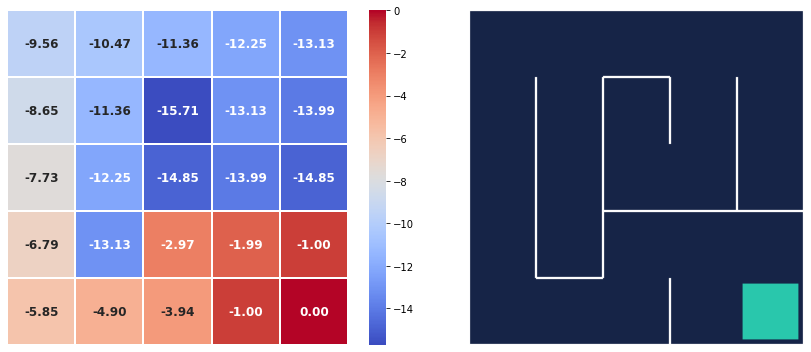

In [22]:
plot_values(state_values, frame)

#### Show resulting policy $\pi(\cdot|s)$

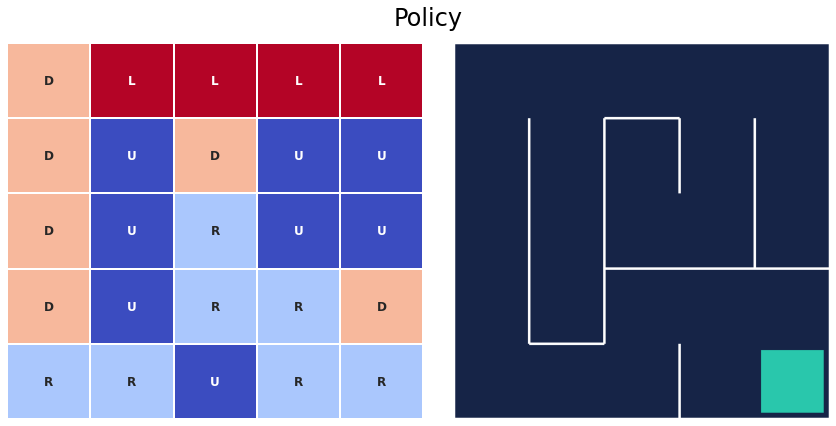

In [23]:
plot_policy(policy_probs, frame)

#### Test the resulting agent

KeyboardInterrupt: 

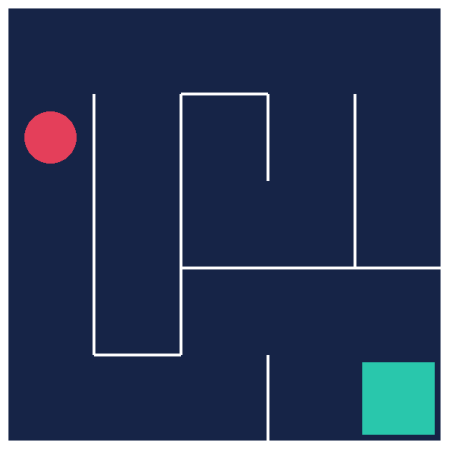

In [24]:
test_agent(env, policy)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 4: Dynamic Programming](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)